# 安裝套件模組

```
pip install pandas
pip install jieba
pip install GoogleNews
pip install matplotlib
pip install Pillow
pip install numpy
pip install scipy
pip install wordcloud
```

PYPI 對應套件簡介
- [GoogleNews](https://pypi.org/project/GoogleNews/)
- [jieba](https://pypi.org/project/jieba/)
- [wordcloud](https://pypi.org/project/wordcloud/)
- [matplotlib](https://pypi.org/project/matplotlib/)
- [PIL](https://pypi.org/project/Pillow/)
- [pandas](https://pypi.org/project/pandas/)
- [numpy](https://pypi.org/project/numpy/)
- [scipy](https://pypi.org/project/scipy/)



In [1]:
# 匯入模組
import pandas as pd
import jieba
from GoogleNews import GoogleNews
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime
from PIL import Image
import numpy as np
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator


需要知道的觀念和套件：

1. Pandas 資料處理
2. GoogleNews 爬蟲套件
3. WordCloud 文字雲套件
4. Image.open 讀取圖片
5. numpy 陣列操作
6. jieba 斷詞套件
7. datetime 日期處理


# 初始化 Google News 物件

In [2]:
# Google News初始化設定
googlenews = GoogleNews(lang='zh-tw', region='TW', encode='utf-8')

# 啟用除錯模式 try except
googlenews.enableException(True)

In [3]:
object = GoogleNews()

print(object)
print(type(object))
print("object 可以使用的屬性跟方法")
print(dir(object))

<class 'GoogleNews.GoogleNews'>
object 可以使用的屬性跟方法
['_GoogleNews__encode', '_GoogleNews__end', '_GoogleNews__exception', '_GoogleNews__lang', '_GoogleNews__links', '_GoogleNews__period', '_GoogleNews__results', '_GoogleNews__section', '_GoogleNews__start', '_GoogleNews__texts', '_GoogleNews__topic', '_GoogleNews__totalcount', '_GoogleNews__version', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'build_response', 'clear', 'enableException', 'getVersion', 'get_links', 'get_news', 'get_page', 'get_texts', 'getpage', 'gettext', 'headers', 'page_at', 'remove_after_last_fullstop', 'result', 'results', 'search', 'setTimeRange', 'set_encode', 'set_lang', 'set_period', 'set_section', 'set_time_range', '

In [4]:
object.set_encode('utf-8')
print(object._GoogleNews__encode)
print(object.__dict__)

utf-8
{'_GoogleNews__texts': [], '_GoogleNews__links': [], '_GoogleNews__results': [], '_GoogleNews__totalcount': 0, 'user_agent': 'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:64.0) Gecko/20100101 Firefox/64.0', '_GoogleNews__lang': 'en', 'headers': {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:64.0) Gecko/20100101 Firefox/64.0'}, '_GoogleNews__period': '', '_GoogleNews__start': '', '_GoogleNews__end': '', '_GoogleNews__encode': 'utf-8', '_GoogleNews__exception': False, '_GoogleNews__version': '1.6.15', '_GoogleNews__topic': None, '_GoogleNews__section': None}


<GoogleNews.GoogleNews object at 0x123a83d70> 物件 記憶體位置

<class 'GoogleNews.GoogleNews'> 哪個類別 資料型態


{'_GoogleNews__texts': [], '_GoogleNews__links': [], '_GoogleNews__results': [], '_GoogleNews__totalcount': 0, 'user_agent': 'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:64.0) Gecko/20100101 Firefox/64.0', '_GoogleNews__lang': 'en', 'headers': {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:64.0) Gecko/20100101 Firefox/64.0'}, '_GoogleNews__period': '', '_GoogleNews__start': '', '_GoogleNews__end': '', '_GoogleNews__encode': 'utf-8', '_GoogleNews__exception': False, '_GoogleNews__version': '1.6.15', '_GoogleNews__topic': None, '_GoogleNews__section': None} 物件的屬性

_ 底線開頭的，類似私有屬性，不希望被外部直接訪問，用方法存取

物件的方法

build_response', 'clear', 'enableException', 'getVersion', 'get_links', 'get_news', 'get_page', 'get_texts', 'getpage', 'gettext', 'headers', 'page_at', 'remove_after_last_fullstop', 'result', 'results', 'search', 'setTimeRange', 'set_encode', 'set_lang', 'set_period', 'set_section', 'set_time_range', 'set_topic', 'setencode', 'setlang', 'setperiod', 'total_count', 'user_agent'


# 使用者輸入關鍵字

In [5]:
# , period='1d'
set_time = input("請輸入要搜尋的時間 (1d, 7d, 30d): ")
googlenews.set_period(set_time)
# 使用者輸入關鍵字
keyword = input("請輸入要搜尋的關鍵字: ")
# keyword = "柯文哲"
googlenews.search(keyword)

In [6]:
# test
result = googlenews.result()
print(f"標題: {result[0]['title']}")

標題: 罷免高虹安「風城安心上路」小蜜峰教師節將出擊 罷免背心首現身



# 顯示搜尋結果

In [7]:
# 獲取搜尋結果
result = googlenews.result()

# 顯示新聞標題和連結
for item in result:
    print(f"標題: {item['title']}")
    print(f"連結: {item['link']}")
    print('---')

標題: 罷免高虹安「風城安心上路」小蜜峰教師節將出擊 罷免背心首現身
連結: https://news.ltn.com.tw/news/HsinchuCity/breakingnews/4812912&ved=2ahUKEwjH9PnJ4OKIAxUgk68BHVUZMmoQxfQBegQIABAC&usg=AOvVaw3RQXvJlEQbBdTaktodv1l4
---
標題: 竹市危險路口改善今年迄今掛零 竹市府：年底前可完成21處
連結: https://hakkanews.tw/2024/09/27/bamboo-citys-dangerous-junction-to-be-improved-so-far-this-year-the-city-government-will-be-able-to-complete-21-places-by-the-end-of-the-year/&ved=2ahUKEwjH9PnJ4OKIAxUgk68BHVUZMmoQxfQBegQICRAC&usg=AOvVaw0JOfB7ZWbb8jzpuTDBXhPN
---
標題: 竹市「低收學生助學金」10／1開放申請！補助金額看這
連結: https://news.housefun.com.tw/news/article/197070438904.html&ved=2ahUKEwjH9PnJ4OKIAxUgk68BHVUZMmoQxfQBegQIBRAC&usg=AOvVaw2pZ4z1zN_yEGxOeufpSxic
---
標題: 驚悚畫面曝！29歲女騎士上班閃臨停車 轎車突硬插「輾1圈」慘死
連結: https://www.ettoday.net/news/20240927/2824858.htm&ved=2ahUKEwjH9PnJ4OKIAxUgk68BHVUZMmoQxfQBegQIBxAC&usg=AOvVaw1B9CSmaF91NFUz9KrhJodE
---
標題: T91步槍扛肩姿勢曝光 新竹市民政處長自嘲回應
連結: https://tw.news.yahoo.com/t91%25E6%25AD%25A5%25E6%25A7%258D%25E6%2589%259B%25E8%2582%25A9%25E5%25A7%25BF%25E5%258B%25A2%25

# 儲存成 Json 格式檔案

In [14]:
# <!-- 儲存至 Json -->
import json

from datetime import datetime

# 獲取當前日期
today = datetime.now().strftime('%Y%m%d')

# 生成文件名
filename = f"./json_output/{today}_{keyword}_{set_time}.json"

# 將 result 寫入 JSON 文件
with open(filename, 'w', encoding='utf-8') as f:
    json.dump(result, f, ensure_ascii=False, indent=4)

print(f"搜尋結果已儲存為: {filename}")


搜尋結果已儲存為: ./json_output/20240927_新竹_10d.json


# 讀取靜態 Json 格式檔案

In [2]:
import json
filename = "./json_output/20240919_柯文哲_15d.json"
# 讀取 JSON 文件
with open(filename, 'r', encoding='utf-8') as f:
    loaded_result = json.load(f)

print(loaded_result)
print(type(loaded_result))


[{'title': '問一整天！ 檢廉第3度提訊 柯文哲表情凝重', 'media': 'YouTube', 'date': '5 分鐘前', 'datetime': nan, 'desc': '檢廉追查京華城案，柯文哲被三度提訊，訊問進行了一整天，中午柯文哲在北檢吃了甜麵包果腹，下午才還押北所。提訊柯文哲期間，還同步約談曾經反對京華城增加容積獎勵的都委...', 'link': 'https://www.youtube.com/watch%3Fv%3Dno9uTfx8xeM&ved=2ahUKEwiHney9-MyIAxWTQPUHHdRRJOIQxfQBegQIBRAC&usg=AOvVaw3zadRkBc5IHmcyaDEAfo7D', 'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='}, {'title': '北檢三度提訊柯文哲 檢廉追查沈慶京5億犒賞金流向', 'media': 'Yahoo新聞', 'date': '3 分鐘前', 'datetime': nan, 'desc': '社會中心／綜合報導遭到收押禁見的民眾黨主席柯文哲，三度被借提訊問，根據週刊報導，威京集團子公司〝鼎越開發〞，標下京華城土地後，沈慶京疑似催促，急著要拿五億分潤價金，...', 'link': 'https://tw.news.yahoo.com/%25E5%258C%2597%25E6%25AA%25A2%25E4%25B8%2589%25E5%25BA%25A6%25E6%258F%2590%25E8%25A8%258A%25E6%259F%25AF%25E6%2596%2587%25E5%2593%25B2-%25E6%25AA%25A2%25E5%25BB%2589%25E8%25BF%25BD%25E6%259F%25A5%25E6%25B2%2588%25E6%2585%25B6%25E4%25BA%25AC5%25E5%2584%2584%25E7%258A%2592%25E8%25B3%259E%25E9%2587%2591%25E6%25B5%2581%25E5%2590%2591-160145805.html&ved=2ah

In [4]:
# 查看資料 資料分類 資料合併 練習

title_tokens = []
desc_tokens = []

all_content = []

for n in range(len(loaded_result)):

    title = loaded_result[n]['title']
    desc = loaded_result[n]['desc']  
    title_tokens.append(loaded_result[n]['title'])
    desc_tokens.append(loaded_result[n]['desc'])
    all_content.append(title + " " + desc)

print(title_tokens)
print(desc_tokens)
print(all_content)
# for item in all_content:
#     print("".join(item))
    




['問一整天！ 檢廉第3度提訊 柯文哲表情凝重', '北檢三度提訊柯文哲 檢廉追查沈慶京5億犒賞金流向', '壹短蘋｜柯文哲被押小草仍死忠支持 但「超越藍綠」難再讓人期待', '白色風暴／賴神立威？陳偉杰：辦鄭文燦、押柯文哲令人生畏', '姚惠珍曝「柯文哲想獲得中共青睞」靠沈慶京牽線！？2018剛好小沈缺錢...打開京華城契機？！【關鍵時刻】 @ebcCTime @57ETFN', '寶傑怒喊「柯文哲根本配合他洗錢」3大巧合曝！？京華城疑「左手賣右手」套現近百億...開工日全為沈慶京？【關鍵時刻】劉寶傑', '京華城協議書有貓膩 許淑華破解柯文哲的「放水」關鍵', '中秋後檢廉動起來！ 打「突襲戰」第三度提訊柯文哲', '【袁紅冰熱點】獨家內幕：北京最高保密等級-對柯文哲統戰的一五七專案(視 - 內幕 - 李靜汝 - (移動版)', '都委會瑟瑟發抖遭恐嚇「柯文哲有罪你們就有罪」！？誰用一篇新聞放風聲？【關鍵時刻】@ebcCTime @newsebc']
['檢廉追查京華城案，柯文哲被三度提訊，訊問進行了一整天，中午柯文哲在北檢吃了甜麵包果腹，下午才還押北所。提訊柯文哲期間，還同步約談曾經反對京華城增加容積獎勵的都委...', '社會中心／綜合報導遭到收押禁見的民眾黨主席柯文哲，三度被借提訊問，根據週刊報導，威京集團子公司〝鼎越開發〞，標下京華城土地後，沈慶京疑似催促，急著要拿五億分潤價金，...', '民眾黨主席柯文哲因涉入京華城容積率弊案，被北院裁定羈押禁見。不過，早在京華城案之前，柯文哲與民眾黨就陷入政治獻金申報不實、選舉補助款買個人商辦、木可公司金流...', '總主筆李彥謀／專訪）民眾黨主席柯文哲因為京華城案被羈押在土城看守所，度過了難忘的中秋節，有人說這是賴清德政府的司法追殺；但其實最開始發難的是國民黨台北市議員...', '報導本於目前偵辦進度與披露資訊，任何人在依法被判決有罪確定前，均應推定為無罪※ 00:00:00 姚惠珍曝「柯文哲想獲得中共青睞」靠沈慶京牽線！？2018剛好小沈缺錢.', '報導本於目前偵辦進度與披露資訊，任何人在依法被判決有罪確定前，均應推定為無罪* (00:00:00) 柯文哲涉貪虎頭鍘砍向沈慶京一張動土照恐重判21年不得不轉汙點證人咬柯？56 分鐘前', '相關新聞：獨家》柯文哲與京華城簽訂協議書曝光！ 竟先給建照後才簽約本

# 停用詞過濾

In [ ]:
# ckip-transformers  0.3.4 

In [8]:
import re
import time
from ckip_transformers import __version__
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker


# Initialize drivers
# 初始化斷詞WS、詞性標記POS、命名實體辨識NER
print("Initializing drivers ... WS")
ws_driver = CkipWordSegmenter(model="bert-base")
print("Initializing drivers ... POS")
pos_driver = CkipPosTagger(model="bert-base")
print("Initializing drivers ... NER")
ner_driver = CkipNerChunker(model="bert-base")
print("Initializing drivers ... done")

def process_text(text):
    # 選取所有 “不是 ＾” 中文（\u4e00-\u9fff）、英文、數字及空格
    pattern = re.compile(r'[^\u4e00-\u9fffA-Za-z0-9\s]')
    # 用空字元取代符合 pattern 的字串
    return pattern.sub('', text)

sentences = []

for item in all_content:
    cleaned_text = process_text(item)
    print(cleaned_text)
    sentences.append(cleaned_text)
    


# 應該用有限制條件去剃掉那些多種不想要的

# - 初始化斷詞（WS）、命名實體辨識（NER）輸入格式 ----> 必須是句子的串列（list of sentences）
# - 詞性標記（POS）輸入格式 ----> 必須是詞串列的串列（list of list of words，來自斷詞的輸出）

all_words = []


# print("\n斷詞結果：")
ws_results = ws_driver(sentences)

all_pos = []

# 執行詞性標記
# print("\n詞性標記結果：")
pos_results = pos_driver(ws_results)
for sentence in pos_results:
    # print(sentence)
    # print(type(sentence))
    
    for pos in sentence:
        all_pos.append(pos)

print(f"總詞性數: {len(all_pos)}")


# print(ws_results)
# print(type(ws_results[0]))
for n, sentence in enumerate(ws_results):
    print(f"句子 {n}:{sentence}")
    # print(len(sentence))
    # print(f"資料型態: {type(sentence)}")
    # print(type(sentence))
    
    # 遍歷每個句子的詞與對應的詞性標註
    for word, pos in zip(sentence, pos_results[n]):
        # 判斷條件：非空字串、詞長度大於1，且詞性為名詞(N)或動詞(V)
        if word.strip() and len(word) > 1 and (pos.startswith('N') or pos.startswith('V')):
            all_words.append(word)
            
    # or all_words.extend(sentence) 把可迭代對象的元素逐個添加到列表的末尾

print("\n所有詞的列表:")
print(all_words)
print(f"總詞數: {len(all_words)}")


# 學習資源附上的的文章教學有比較乾淨的寫法 用 double zip 



Initializing drivers ... WS
Initializing drivers ... POS
Initializing drivers ... NER
Initializing drivers ... done
問一整天 檢廉第3度提訊 柯文哲表情凝重 檢廉追查京華城案柯文哲被三度提訊訊問進行了一整天中午柯文哲在北檢吃了甜麵包果腹下午才還押北所提訊柯文哲期間還同步約談曾經反對京華城增加容積獎勵的都委
北檢三度提訊柯文哲 檢廉追查沈慶京5億犒賞金流向 社會中心綜合報導遭到收押禁見的民眾黨主席柯文哲三度被借提訊問根據週刊報導威京集團子公司鼎越開發標下京華城土地後沈慶京疑似催促急著要拿五億分潤價金
壹短蘋柯文哲被押小草仍死忠支持 但超越藍綠難再讓人期待 民眾黨主席柯文哲因涉入京華城容積率弊案被北院裁定羈押禁見不過早在京華城案之前柯文哲與民眾黨就陷入政治獻金申報不實選舉補助款買個人商辦木可公司金流
白色風暴賴神立威陳偉杰辦鄭文燦押柯文哲令人生畏 總主筆李彥謀專訪民眾黨主席柯文哲因為京華城案被羈押在土城看守所度過了難忘的中秋節有人說這是賴清德政府的司法追殺但其實最開始發難的是國民黨台北市議員
姚惠珍曝柯文哲想獲得中共青睞靠沈慶京牽線2018剛好小沈缺錢打開京華城契機關鍵時刻 ebcCTime 57ETFN 報導本於目前偵辦進度與披露資訊任何人在依法被判決有罪確定前均應推定為無罪 000000 姚惠珍曝柯文哲想獲得中共青睞靠沈慶京牽線2018剛好小沈缺錢
寶傑怒喊柯文哲根本配合他洗錢3大巧合曝京華城疑左手賣右手套現近百億開工日全為沈慶京關鍵時刻劉寶傑 報導本於目前偵辦進度與披露資訊任何人在依法被判決有罪確定前均應推定為無罪 000000 柯文哲涉貪虎頭鍘砍向沈慶京一張動土照恐重判21年不得不轉汙點證人咬柯56 分鐘前
京華城協議書有貓膩 許淑華破解柯文哲的放水關鍵 相關新聞獨家柯文哲與京華城簽訂協議書曝光 竟先給建照後才簽約本報獨家揭露前台北市長柯文哲代表北市府和京華城子公司鼎越開發公司簽訂京華城協議書
中秋後檢廉動起來 打突襲戰第三度提訊柯文哲 中秋過後檢方再打突襲戰一早第三度提訊柯文哲一路問到下午逐一比對金流根據週刊報導檢方解密柯文哲的隨身碟從相關記錄勾稽比對疑似把隨身碟視為索賄
袁紅冰熱點獨家內幕北京最高保密等級對柯文哲統戰的一五七專案視  內幕  李

Inference: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

總詞性數: 557
句子 0:['問', '一', '整', '天', ' ', '檢廉', '第3', '度', '提訊', ' ', '柯文哲', '表情', '凝重', ' ', '檢廉', '追查', '京華城案', '柯文哲', '被', '三', '度', '提訊', '訊問', '進行', '了', '一', '整', '天', '中午', '柯文哲', '在', '北檢', '吃', '了', '甜', '麵包', '果腹', '下午', '才', '還', '押', '北所', '提訊', '柯文哲', '期間', '還', '同步', '約談', '曾經', '反對', '京華城', '增加', '容積', '獎勵', '的', '都委']
句子 1:['北檢', '三', '度', '提訊', '柯文哲', ' ', '檢廉', '追查', '沈慶京', '5億', '犒賞金', '流向', ' ', '社會', '中心', '綜合', '報導', '遭到', '收押', '禁見', '的', '民眾黨', '主席', '柯文哲', '三', '度', '被', '借提', '訊問', '根據', '週刊', '報導', '威京', '集團', '子公司', '鼎越', '開發', '標下', '京華城', '土地', '後', '沈慶京', '疑似', '催促', '急', '著', '要', '拿', '五億', '分', '潤', '價金']
句子 2:['壹短蘋', '柯文哲', '被', '押', '小草', '仍', '死忠', '支持', ' ', '但', '超越', '藍綠', '難', '再', '讓', '人', '期待', ' ', '民眾黨', '主席', '柯文哲', '因', '涉入', '京華城', '容積率', '弊案', '被', '北院', '裁定', '羈押', '禁見', '不過', '早', '在', '京華城案', '之前', '柯文哲', '與', '民眾黨', '就', '陷入', '政治', '獻金', '申報', '不實', '選舉', '補助款', '買', '個人', '商辦', '木可', '公司', '金流']
句子 3:['白色風暴', '賴', '神', '立', '威', '陳

In [12]:
import re
import jieba.analyse

# 讀取停用詞
with open(r'./stopword.txt', 'r', encoding='utf-8') as file:
    stopword = file.read().splitlines() # BIF splitlines
    # print(stopword)

# 合併標題和描述，\n 是方便閱讀，可以不用加
all_content = ""
for item in loaded_result:
    all_content += item['title'] + "\n"
    if 'desc' in item:
        all_content += item['desc'] + "\n"
    all_content += "\n"

# print("原始內容:")
# print(all_content)

print("斷詞結果:")
seg_list = jieba.lcut(all_content)
print(seg_list)
print("--"*60)

# 原本的正則表達式
# english_pattern = re.compile(r'^[a-zA-Z]+$')

# def is_english(text):
#     return bool(english_pattern.match(text))

# 過濾停用詞和空白字符
filtered_words = []
for word in seg_list:
    # 去除詞的前後空白 跟上面產生的 \n
    cleaned_word = word.strip()
    
    cleaned_word = re.sub(r'[^\u4e00-\u9fffA-Za-z0-9\s]', '', cleaned_word)
    # re.sub(pattern, repl, string, count=0)
    # 檢查詞是否為空且不在停用詞列表中
    if cleaned_word and cleaned_word not in stopword:
        filtered_words.append(cleaned_word)

print('過濾後的結果: ')
print(len(filtered_words))
print("--"*60)

# 使用 jieba TF-IDF 算法提取關鍵詞
tags = jieba.analyse.extract_tags("".join(filtered_words), topK=10, withWeight=True)

# print("\n提取的關鍵詞:")
# print("Tags type:", type(tags))
# print("Tags content:", tags)

top_50_tags = [tag for tag, _ in tags]

second_filtered_words = []
print("\nTF-IDF 關鍵詞及其權重:")
for tag_tuple in tags:
    tag = tag_tuple[0]
    weight = tag_tuple[1]
    print(f"{tag}: {int(weight * 10000)}")
    
for word in filtered_words:
    if word in top_50_tags:
        second_filtered_words.append(word)

# 使用 TextRank 算法提取關鍵詞
textrank_tags = jieba.analyse.textrank("".join(filtered_words), topK=10, withWeight=True)

# print("\nTextRank 提取的關鍵詞:")
# print("TextRank Tags type:", type(textrank_tags))
# print("TextRank Tags content:", textrank_tags)

top_50_textrank_tags = [tag for tag, _ in textrank_tags]

third_filtered_words = []
print("\nTextRank 關鍵詞及其權重:")
for tag_tuple in textrank_tags:
    tag = tag_tuple[0]
    weight = tag_tuple[1]
    print(f"{tag}: {weight:.4f}")
    
for word in filtered_words:
    if word in top_50_textrank_tags:
        third_filtered_words.append(word)

print("--"*60)
print("第一種過濾後的結果 (TF-IDF): ")
print(second_filtered_words)
print(len(second_filtered_words))

print("--"*60)
print("第二種過濾後的結果 (TextRank): ")
print(third_filtered_words)
print(len(third_filtered_words))
        
# You can choose which filtered words to use for further processing
# filtered_words = second_filtered_words  # Using TF-IDF results
# filtered_words = third_filtered_words  # Using TextRank results


斷詞結果:
['問', '一整天', '！', ' ', '檢廉', '第', '3', '度', '提訊', ' ', '柯文', '哲', '表情', '凝重', '\n', '檢廉', '追查', '京華城案', '，', '柯文', '哲', '被', '三度', '提訊', '，', '訊', '問進行', '了', '一整天', '，', '中午', '柯文', '哲在', '北檢吃', '了', '甜', '麵', '包', '果腹', '，', '下午', '才', '還押', '北所', '。', '提訊', '柯文', '哲期間', '，', '還', '同步', '約', '談', '曾', '經反', '對京華城', '增加', '容積', '獎勵', '的', '都', '委', '...', '\n', '\n', '北檢', '三度', '提訊', '柯文', '哲', ' ', '檢廉', '追查', '沈慶京', '5', '億', '犒賞', '金', '流向', '\n', '社會', '中心', '／', '綜合', '報導', '遭到', '收', '押禁', '見', '的', '民眾', '黨', '主席', '柯文', '哲', '，', '三度', '被', '借', '提訊問', '，', '根據', '週刊', '報導', '，', '威京', '集團', '子公司', '〝', '鼎越', '開發', '〞', '，', '標下京華城', '土地', '後', '，', '沈慶京', '疑似', '催促', '，', '急著', '要', '拿', '五', '億分潤', '價金', '，', '...', '\n', '\n', '壹', '短', '蘋', '｜', '柯文', '哲', '被', '押', '小草', '仍', '死忠', '支持', ' ', '但', '「', '超越', '藍綠', '」', '難', '再', '讓', '人', '期待', '\n', '民眾', '黨', '主席', '柯文', '哲因', '涉入', '京華城容', '積率', '弊案', '，', '被', '北院', '裁定', '羈', '押禁', '見', '。', '不過', '，', '早', '在


   - `^` 表示字符串的開始
   - `[a-zA-Z]` 表示任何英文字母（大寫或小寫）
   - `+` 表示前面的字符至少出現一次
   - `$` 表示字符串的結束
   -  `.*`：匹配任意字符（除換行符外）零次或多次

In [ ]:
import re

english_pattern = re.compile(r'^[a-zA-Z]+$')

def process_text(text):
    return bool(english_pattern.match(text))



# 計算文字出現次數

In [84]:
# 使用 BIF Counter 計算詞頻
word_count = Counter(filtered_words)
print(word_count)
print(type(word_count))
print(dir(word_count))

print("--"*60)

print("word_count.items():")
print(word_count.items())
print(type(word_count.items()))

print("--"*60)

# 將 word_count 轉換為 dict
# word_count_dict = dict(word_count)
# 欸？ counter 轉 dict 後，key 的順序改變了

from collections import OrderedDict
word_count_dict = OrderedDict(word_count.most_common())

print("word_count_dict:")
print(word_count_dict)
print(type(word_count_dict))
print(f"字典數量: {len(word_count_dict)}")
print("--"*60)

 

Counter({'柯文': 18, '民眾': 7, '偵辦': 5, '主席': 5, '沈慶京': 5, '政治': 4, '廉政': 4, '蔡壁': 4, '今晚': 3, '議員': 3, '社會局': 2, '假動土': 2, '建照': 2, '軍令狀': 2, '搶救': 2, '弊案': 2, '疑有料': 2, '服務': 2, '分鐘': 2, '獻金': 2, '立委': 2, '羈押': 2, '高雄場': 2, '登場': 2, '國昌': 2, '黨戶': 2, '開講': 2, '小時': 2, '哲弊': 2, '案延燒': 2, '沈慶京轉': 2, '點證': 2, '機率': 2, '小平酸': 2, '不要命': 2, '上吐下': 2, '還不招': 2, '阿北爛': 2, '留給': 2, '驚爆': 2, '新聞線': 2, '20240920': 2, '立新': 2, '聞台': 2, '市府': 2, '假開工': 2, '民視': 2, '新聞': 2, '2022': 2, '1500': 2})
<class 'collections.Counter'>
['__add__', '__and__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__init__', '__init_subclass__', '__ior__', '__isub__', '__iter__', '__le__', '__len__', '__lt__', '__missing__', '__module__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__reduce__', '__reduce_ex__', '__

# 從字典取出資料

字典可以使用的方法
['clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 

'pop', 'popitem', 'setdefault', 'update', 'values']


In [85]:
# print(dir(word_count_dict))
# print(word_count_dict.items())
# print(type(word_count_dict.items()))
# print(word_count_dict.keys())
# words = list(word_count_dict.keys())
# counts = list(word_count_dict.values())

# items ===> 同時取出 key 和 value 就可以直接加入 dataframe

words = []
counts = []

print("--"*60)

for key in word_count_dict:
    print(key, word_count_dict[key])
    words.append(key)
    counts.append(word_count_dict[key])

# words = [key for key in word_count_dict]
# counts = [word_count_dict[key] for key in word_count_dict]

print(words)
print(counts)

print("--"*60)

------------------------------------------------------------------------------------------------------------------------
柯文 18
民眾 7
偵辦 5
主席 5
沈慶京 5
政治 4
廉政 4
蔡壁 4
今晚 3
議員 3
社會局 2
假動土 2
建照 2
軍令狀 2
搶救 2
弊案 2
疑有料 2
服務 2
分鐘 2
獻金 2
立委 2
羈押 2
高雄場 2
登場 2
國昌 2
黨戶 2
開講 2
小時 2
哲弊 2
案延燒 2
沈慶京轉 2
點證 2
機率 2
小平酸 2
不要命 2
上吐下 2
還不招 2
阿北爛 2
留給 2
驚爆 2
新聞線 2
20240920 2
立新 2
聞台 2
市府 2
假開工 2
民視 2
新聞 2
2022 2
1500 2
['柯文', '民眾', '偵辦', '主席', '沈慶京', '政治', '廉政', '蔡壁', '今晚', '議員', '社會局', '假動土', '建照', '軍令狀', '搶救', '弊案', '疑有料', '服務', '分鐘', '獻金', '立委', '羈押', '高雄場', '登場', '國昌', '黨戶', '開講', '小時', '哲弊', '案延燒', '沈慶京轉', '點證', '機率', '小平酸', '不要命', '上吐下', '還不招', '阿北爛', '留給', '驚爆', '新聞線', '20240920', '立新', '聞台', '市府', '假開工', '民視', '新聞', '2022', '1500']
[18, 7, 5, 5, 5, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
------------------------------------------------------------------------------------------------------------------------


# 使用 Pandas 排序呈現資料

練習用 Series 方式加入


In [86]:
# 創建一個 pandas Series，使用單字作為索引，詞頻作為值
word_count_series = pd.Series(data=counts, index=words, name='一維陣列詞頻Series')
print(word_count_series.info())
print(word_count_series.head)
print("--"*60)

<class 'pandas.core.series.Series'>
Index: 50 entries, 柯文 to 1500
Series name: 一維陣列詞頻Series
Non-Null Count  Dtype
--------------  -----
50 non-null     int64
dtypes: int64(1)
memory usage: 800.0+ bytes
None
<bound method NDFrame.head of 柯文          18
民眾           7
偵辦           5
主席           5
沈慶京          5
政治           4
廉政           4
蔡壁           4
今晚           3
議員           3
社會局          2
假動土          2
建照           2
軍令狀          2
搶救           2
弊案           2
疑有料          2
服務           2
分鐘           2
獻金           2
立委           2
羈押           2
高雄場          2
登場           2
國昌           2
黨戶           2
開講           2
小時           2
哲弊           2
案延燒          2
沈慶京轉         2
點證           2
機率           2
小平酸          2
不要命          2
上吐下          2
還不招          2
阿北爛          2
留給           2
驚爆           2
新聞線          2
20240920     2
立新           2
聞台           2
市府           2
假開工          2
民視           2
新聞           2
2022         2
1500         2
Name: 一維陣列詞頻S

In [87]:
word_text_series = pd.Series(data=words, name='一維陣列文字Series')
print(word_text_series.info())

print("--"*60)
print(word_text_series.head())

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: 一維陣列文字Series
Non-Null Count  Dtype 
--------------  ----- 
50 non-null     object
dtypes: object(1)
memory usage: 532.0+ bytes
None
------------------------------------------------------------------------------------------------------------------------
0     柯文
1     民眾
2     偵辦
3     主席
4    沈慶京
Name: 一維陣列文字Series, dtype: object


In [88]:
# 將單一 Series 轉換為 DataFrame
df = word_count_series.reset_index()
df.columns = ['word', 'count']  # 重命名列
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    50 non-null     object
 1   count   50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 932.0+ bytes
None
  word  count
0   柯文     18
1   民眾      7
2   偵辦      5
3   主席      5
4  沈慶京      5


In [89]:
# 將多個 Series 轉換為 DataFrame

# 重置兩個 Series 的索引
word_text_series = word_text_series.reset_index(drop=True)
word_count_series = word_count_series.reset_index(drop=True)

# 使用 concat 創建 DataFrame
df = pd.concat([word_text_series, word_count_series], axis=1)

# 重命名列
df.columns = ['word', 'count']

# 顯示 DataFrame 的資訊
print(df.info())

# 顯示 DataFrame 的前幾行
print("DataFrame 預覽：")
print(df.head())

# # 如果需要，可以按計數降序排序
# df_sorted = df.sort_values('count', ascending=False).reset_index(drop=True)

# # 顯示排序後的 DataFrame 前幾行
# print("\n排序後：")
# print(df_sorted.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    50 non-null     object
 1   count   50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 932.0+ bytes
None
DataFrame 預覽：
  word  count
0   柯文     18
1   民眾      7
2   偵辦      5
3   主席      5
4  沈慶京      5


In [90]:
# 將字典轉 list 放入 DataFrame
df2 = pd.DataFrame(list(word_count_dict.items()), columns=['word', 'count'])


# df_sorted_org = df.sort_values(by='count', ascending=False)
df_sorted = df2.sort_values(by='count', ascending=False).reset_index(drop=True)

print("df2:")
print(df2)
print("--"*60)
print("\ndf_sorted 資料結構:")
print(df_sorted.info())
print("\ndf_sorted:")
print(df_sorted.head)
print("\ndf_sorted 索引:")
print(df_sorted.index)


df2:
        word  count
0         柯文     18
1         民眾      7
2         偵辦      5
3         主席      5
4        沈慶京      5
5         政治      4
6         廉政      4
7         蔡壁      4
8         今晚      3
9         議員      3
10       社會局      2
11       假動土      2
12        建照      2
13       軍令狀      2
14        搶救      2
15        弊案      2
16       疑有料      2
17        服務      2
18        分鐘      2
19        獻金      2
20        立委      2
21        羈押      2
22       高雄場      2
23        登場      2
24        國昌      2
25        黨戶      2
26        開講      2
27        小時      2
28        哲弊      2
29       案延燒      2
30      沈慶京轉      2
31        點證      2
32        機率      2
33       小平酸      2
34       不要命      2
35       上吐下      2
36       還不招      2
37       阿北爛      2
38        留給      2
39        驚爆      2
40       新聞線      2
41  20240920      2
42        立新      2
43        聞台      2
44        市府      2
45       假開工      2
46        民視      2
47        新聞      2
48      2022   

# 製作文字雲圖片遮罩

/Users/larry/Github/Python-WordCloud/TaipeiSansTCBeta-Bold.ttf
(540, 960)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


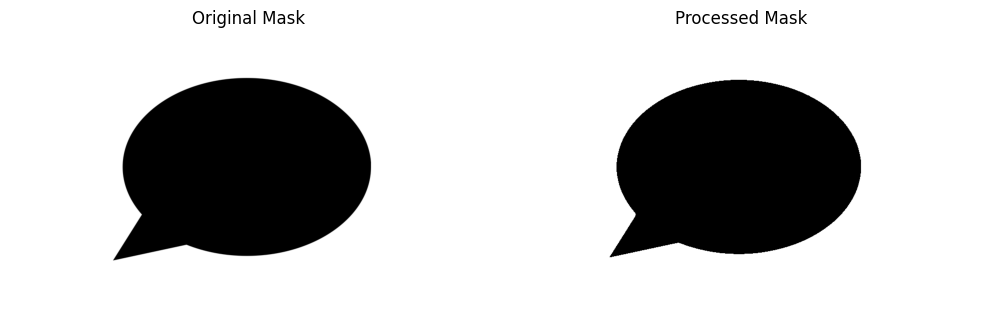

原始x色像素數量：144292，總像素數：1555200（佔比：9.28%）
處理後x色像素數量：144292，總像素數：1555200（佔比：9.28%）


In [176]:
# 正常圖片版本

# from PIL import ImageOps # 反轉黑白
# ImageOps.invert()

# 詢問使用者字體檔案路徑
# font_path_input = input("請輸入中文字體的檔案路徑: ")
font_path_input = "/Users/larry/Github/Python-WordCloud/TaipeiSansTCBeta-Bold.ttf"
print(font_path_input)

# 文字雲圖片遮罩檔案路徑
img_path = "./Mask_Image/Messenge_mask.png"


mask_color = np.array((Image.open(img_path).convert("RGB")).resize((960, 540)))
# mask_color = mask_color[::2, ::2]

total_pixels = mask_color.size
# total_pixels = mask_image.shape[0] * mask_image.shape[1]

org_filtered_pixels = np.sum(np.all(mask_color == 0, axis=2))

mask_image = mask_color.copy()

threshold = 20 # 根據圖片調整閾值
mask_image[np.all(mask_image > threshold, axis=2)] = 255
# 只要是（偏）()色區域，都設為()色
filtered_pixels = np.sum(np.all(mask_image == 0, axis=2))

# 邊緣檢測 (進階用法，此部分為當初課堂老師提供)
# 我的理解：將三個顏色通道做了某個處理，然後將三個通道的結果累加，最後除以 3 得到平均值
edges = np.mean([gaussian_gradient_magnitude(mask_image[:, :, i] / 255., 1) for i in range(3)], axis=0)
print(edges.shape)
print(edges)
# 使用平均值作為閾值
threshold = edges.mean() * 0.2
mask_image[edges > threshold] = 255


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# 顯示原始遮罩圖片
ax1.imshow(mask_color)
ax1.set_title("Original Mask")
ax1.axis('off')

# 顯示處理後的遮罩圖片
ax2.imshow(mask_image)
ax2.set_title("Processed Mask")
ax2.axis('off')

plt.tight_layout()
plt.show()




print(f"原始x色像素數量：{org_filtered_pixels}，總像素數：{total_pixels}（佔比：{org_filtered_pixels/total_pixels*100:.2f}%）")
print(f"處理後x色像素數量：{filtered_pixels}，總像素數：{total_pixels}（佔比：{filtered_pixels/total_pixels*100:.2f}%）")

# 將高於閾值的邊緣像素設為白色

# 顏色生成
image_colors = ImageColorGenerator(mask_image)
# image_colors.default_color = [0.9,0.9,0.9]


In [1]:
# 選擇黑色遮罩圖案練習處理圖片

# # from PIL import ImageOps # 反轉黑白
# # ImageOps.invert()

# # 詢問使用者字體檔案路徑
# # font_path_input = input("請輸入中文字體的檔案路徑: ")
# font_path_input = "/Users/larry/Github/Python-WordCloud/TaipeiSansTCBeta-Bold.ttf"
# print(font_path_input)
# # 文字雲圖片遮罩檔案路徑
# img_path = "./Mask_Image/LeafDrak_mask.png"

# # 讀取遮罩圖片，轉換為 RGB，調整大小，然後轉換為 numpy 陣列
# # mask_color = np.array(Image.open(img_path).convert("RGB").resize((960, 540)))

# # 轉灰階
# mask_color = np.array((Image.open(img_path).convert("L")).resize((960, 540)))
# # 查看 mask_color 的類型和屬性
# print("Type of mask_color:", type(mask_color))
# print("Shape of mask_color:", mask_color.shape)
# print("Data type of mask_color:", mask_color.dtype)
# # print("Attributes and methods of array:", dir(mask_color))
# total_pixels = mask_color.size
# # org_filtered_pixels = np.sum(np.all(mask_image == 255, axis=2))
# org_pixels = np.sum(mask_color == 255)

# # 縮小
# # # 每隔 n 個像素取一個像素
# # # mask_color = mask_color[::4, ::4]

# # # 放大（重複像素）
# # mask_color_large = np.repeat(np.repeat(mask_color, 4, axis=0), 4, axis=1)

# # 進行二次處理，保留灰階
# mask_image = mask_color.copy()
# # 不使用模組，numpy 反轉處理方式
# # mask_image = 255 - mask_color
# # 去噪應用
# threshold1 = 190
# threshold2 = 20
# # mask_image[np.all(mask_image < threshold, axis=2)] = 255
# mask_image[mask_image < threshold2] = 0
# mask_image[mask_image > threshold1] = 255

# # 只要是（偏）()色區域，都設為()色

# # 高級用法，感謝 GPT 的解釋，真的是很厲害的做法....
# # 0-255 變成 0-1 的數據，然後把 某個閾值以上的數據變成 1，剩下的變成 0
# # 然後再次合成上去

# # 對灰階圖像進行邊緣檢測

# edges = gaussian_gradient_magnitude(mask_image, sigma=0.4)
# # 設置邊緣閾值
# edge_threshold = edges.mean()

# # 創建邊緣遮罩 True 為 1，False 為 0 ---> 1 (資料格式)＊ 255 白色
# edge_mask = (edges > edge_threshold).astype(np.uint8) * 255

# # 將邊緣與原始遮罩結合
# mask_image = np.maximum(mask_image, edge_mask)


# # 三維陣列圖片邊緣檢測 (進階用法，此部分為當初課堂老師提供，要有一定的 numpy 操作陣列觀念後，才比較了解這個做法)

# # 我的理解：將三個顏色通道做了某個處理，然後將三個通道的結果累加，最後除以 3 得到平均值
# # edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i] / 255., 2) for i in range(3)], axis=0)


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# # 顯示原始遮罩圖片
# ax1.imshow(mask_color, cmap='gray')
# ax1.set_title("Original Mask")
# ax1.axis('off')

# # 顯示處理後的遮罩圖片
# ax2.imshow(mask_image, cmap='gray')
# ax2.set_title("Processed Mask")
# ax2.axis('off')

# plt.tight_layout()
# plt.show()



# # filtered_pixels = np.sum(np.all(mask_image == 255, axis=2))
# filtered_pixels = np.sum(mask_image == 255)
# # total_pixels = mask_image.shape[0] * mask_image.shape[1]


# print(f"原始x色像素數量：{org_pixels}，總像素數：{total_pixels}（佔比：{org_pixels/total_pixels*100:.2f}%）")
# print(f"處理後x色像素數量：{filtered_pixels}，總像素數：{total_pixels}（佔比：{filtered_pixels/total_pixels*100:.2f}%）")

# # 將高於閾值的邊緣像素設為白色

# # 顏色生成
# # image_colors = ImageColorGenerator(mask_image)
# # image_colors.default_color = [0.9,0.9,0.9]


"""

AI 回覆的內容，關於邊緣檢測：

這個版本的代碼做了以下事情：

1. 創建一個與單個顏色通道相同大小的零矩陣。
2. 遍歷三個顏色通道（RGB）。
3. 對每個通道計算高斯梯度幅值。
4. 將每個通道的梯度累加到 `edges` 矩陣中。
5. 最後，將累加的結果除以 3 來獲得平均值。

這個方法實現了與原始代碼相同的功能，但避免了使用列表推導式和 `np.mean` 的 `axis` 參數，可能更容易理解每一步在做什麼。最後，仍然將高於閾值的邊緣像素設為白色，以在遮罩中突出顯示邊緣。


- 高斯梯度幅值越低 → 越可能是平滑區域（非邊緣）

- 高斯梯度幅值越高 → 越可能是邊緣

我：邊緣設為白色不就是不明顯了嗎？

您提出了一個很好的觀察。讓我解釋一下這個看似矛盾的做法的原因：

1. 在生成詞雲的上下文中，白色（255）通常代表可以放置文字的區域。

2. 將邊緣設為白色的目的不是為了在最終的詞雲中使邊緣更明顯，而是為了指導詞雲生成算法在哪裡可以放置文字。

3. 通過將邊緣設為白色，我們實際上是告訴詞雲生成器："這些是圖像的重要特徵，你可以在這些地方放置文字"。

4. 這樣做的結果是，文字會傾向於沿著原始圖像的輪廓和主要特徵分布，而不是隨機分布或覆蓋重要的視覺元素。

5. 在最終的詞雲中，這些邊緣不會直接可見，但它們會影響文字的排列方式，使得詞雲的整體形狀能夠反映原始圖像的輪廓。

所以，雖然在遮罩圖像中邊緣被設為白色看起來不明顯，但這實際上是為了在生成詞雲時保留原始圖像的結構和形狀。最終的效果是，生成的詞雲會呈現出原始圖像的大致輪廓，而不是完全忽視圖像的特徵。

如果您想要在最終的詞雲中使邊緣更加明顯，可以考慮相反的方法：將邊緣設為黑色或其他深色，這樣詞雲生成器就會避免在這些區域放置文字，從而在視覺上保留原始圖像的輪廓。

"""

AI 回覆，關於 Pillow 的 Mode 參數


1. "L" (Luminance) 模式：
   - 每個像素用 0 到 255 的整數值表示，其中 0 是黑色，255 是白色。
2. "RGB" (Red, Green, Blue) 模式：
3. "RGBA" (Red, Green, Blue, Alpha) 模式：
4. "1" (1-bit pixels, black and white) 模式：
   - 每個像素只能是 0（黑）或 1（白）。

<!-- 使用 Python Teseeract OCR OpenCV 模組處理圖片，有用過 -->

In [20]:
# 因為轉灰階變成二維，再轉回去三維
print(mask_image.shape)
if len(mask_image.shape) == 2:
    mask_image = np.stack((mask_image) * 3, axis=-1)
    print(mask_image.shape)
    print(mask_image)

(540, 960, 3)


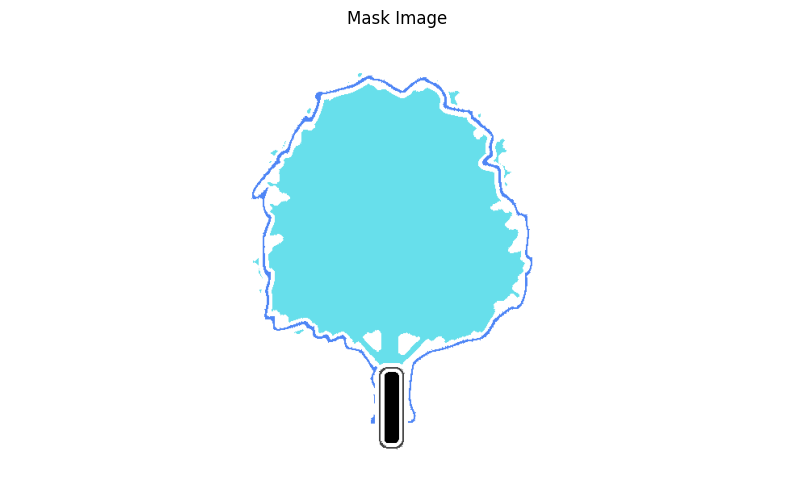

Mask shape: (540, 960, 3)
Mask dtype: uint8
Mask min value: 0
Mask max value: 255


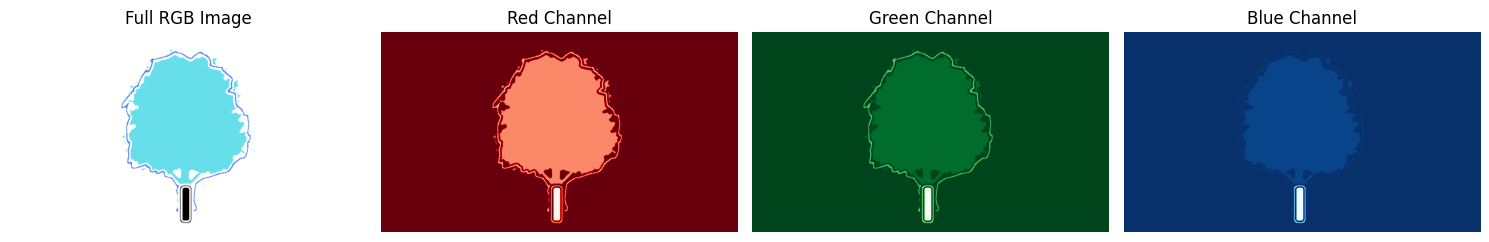

In [108]:
import matplotlib.pyplot as plt

# 檢查轉換後的遮罩圖片
plt.figure(figsize=(10, 6))
plt.imshow(mask_image)
plt.title("Mask Image")
plt.axis('off')
plt.show()

# 打印遮罩圖片的形狀和一些基本統計信息
print("Mask shape:", mask_image.shape)
print("Mask dtype:", mask_image.dtype)
print("Mask min value:", mask_image.min())
print("Mask max value:", mask_image.max())

# 如果需要查看 RGB 通道
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))
# 顯示完整的 RGB 圖像
ax1.imshow(mask_image)
ax1.set_title('Full RGB Image')
ax1.axis('off')

# 顯示紅色通道
ax2.imshow(mask_image[:,:,0], cmap='Reds')
ax2.set_title('Red Channel')
ax2.axis('off')

# 顯示綠色通道
ax3.imshow(mask_image[:,:,1], cmap='Greens')
ax3.set_title('Green Channel')
ax3.axis('off')

# 顯示藍色通道
ax4.imshow(mask_image[:,:,2], cmap='Blues')
ax4.set_title('Blue Channel')
ax4.axis('off')

plt.tight_layout()
plt.show()

# 生成文字雲

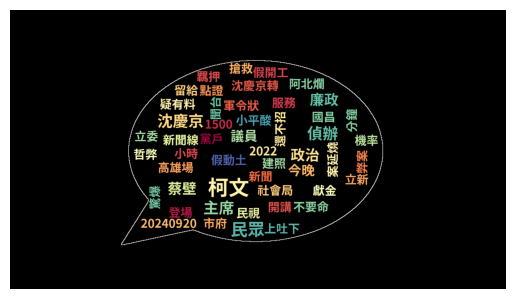

文字雲圖片已儲存為: ./img/20240920_柯文哲_title+desc_relative_scaling50%.png


In [178]:
# 生成文字雲

# wordcloud = WordCloud(font_path=font_path_input, width=320, height=320,max_font_size=50,max_words=4000,color_func=image_colors).generate_from_frequencies(word_count)
wordcloud = WordCloud(
    font_path=font_path_input,
    width=960,  # 增加寬度以提高畫質
    height=540,  # 增加高度以提高畫質
    mask=mask_image,
    max_font_size=40,  # 增加最大字體大小
    max_words=400,
    # color_func=image_colors,
    prefer_horizontal=0.9,  # 90% 的詞水平放置
    scale=2,  # 增加縮放比例以提高畫質
    min_font_size=10,  # 設置最小字體大小
    background_color="black",  # 設置背景顏色
    mode="RGB",
    relative_scaling=0.3,  # 平衡詞頻和詞排名的重要性
    collocations=True,  # 包含常見詞組
    colormap="Spectral",
    contour_width=0.001,  # 添加輪廓以增強視覺效果
    contour_color="white"# 設置輪廓顏色
).generate_from_frequencies(word_count_dict)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# 儲存文字雲圖片 檔案名稱格式化
today = datetime.now().strftime('%Y%m%d')
image_filename = f"./img/{today}_{keyword}_title+desc_relative_scaling50%.png"
wordcloud.to_file(image_filename)
print(f"文字雲圖片已儲存為: {image_filename}")

## WordCloud 參數釐清

AI 回覆的內容，關於參數說明：

您提出了一個很好的問題，這確實需要進一步澄清。您是對的，排名通常是基於詞頻的，但它們在詞雲生成中的作用略有不同。讓我解釋得更清楚：

1. 排名 vs 詞頻：
   - 排名：詞的相對位置（第1常見、第2常見等）
   - 詞頻：詞出現的實際次數

2. 差異的重要性：
   - 排名只反映相對順序，不顯示頻率差距
   - 詞頻反映實際出現次數，顯示詞與詞之間的差距

3. 舉例說明：
   假設有三個詞：
   - A：出現100次（排名1）
   - B：出現99次（排名2）
   - C：出現10次（排名3）

   - 純基於排名（0.0）：A、B、C的大小差異很小
   - 純基於詞頻（1.0）：A和B幾乎一樣大，C明顯小得多

4. `relative_scaling` 的作用：
   - 0.0：主要考慮排名，A、B、C大小差異不大
   - 1.0：完全按詞頻，A、B很大且相近，C很小
   - 0.5：平衡兩者，反映排名，也部分反映頻率差異

所以，雖然排名確實基於詞頻，但 `relative_scaling` 參數允許您決定是更注重詞的相對順序（排名），還是更注重詞之間的實際頻率差異。這提供了在視覺呈現上的靈活性。

# 其他資訊確認

In [23]:
import os

print("Current working directory:", os.getcwd())
print("Font file exists:", os.path.exists(font_path_input))

Current working directory: /Users/larry/Github/Python-WordCloud
Font file exists: True


(2024/09/17更新)

- `get_news()` 函數目前返回的是 Google 頁面轉址連結
- 參考 [SuYenTing/Python-web-crawler](https://github.com/SuYenTing/Python-web-crawler/blob/main/google_real_time_news.py) 專案，使用 google-news-url-decoder 模組解決轉址問題
- `search()` 函數可以獲取真正的新聞網址
- 非英文語言搜尋時，無法返回正確的 datetime 時間格式